In [60]:
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model

In [61]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

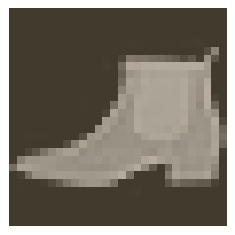

In [62]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [63]:
model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [64]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

('Epoch: 1/2.. ', 'Training Loss: 1.640.. ', 'Test Loss: 0.964.. ', 'Test Accuracy: 0.623')
('Epoch: 1/2.. ', 'Training Loss: 1.025.. ', 'Test Loss: 0.777.. ', 'Test Accuracy: 0.708')
('Epoch: 1/2.. ', 'Training Loss: 0.882.. ', 'Test Loss: 0.670.. ', 'Test Accuracy: 0.748')
('Epoch: 1/2.. ', 'Training Loss: 0.789.. ', 'Test Loss: 0.651.. ', 'Test Accuracy: 0.756')
('Epoch: 1/2.. ', 'Training Loss: 0.772.. ', 'Test Loss: 0.640.. ', 'Test Accuracy: 0.760')
('Epoch: 1/2.. ', 'Training Loss: 0.714.. ', 'Test Loss: 0.584.. ', 'Test Accuracy: 0.772')
('Epoch: 1/2.. ', 'Training Loss: 0.713.. ', 'Test Loss: 0.600.. ', 'Test Accuracy: 0.782')
('Epoch: 1/2.. ', 'Training Loss: 0.701.. ', 'Test Loss: 0.560.. ', 'Test Accuracy: 0.789')
('Epoch: 1/2.. ', 'Training Loss: 0.639.. ', 'Test Loss: 0.558.. ', 'Test Accuracy: 0.790')
('Epoch: 1/2.. ', 'Training Loss: 0.675.. ', 'Test Loss: 0.558.. ', 'Test Accuracy: 0.785')
('Epoch: 1/2.. ', 'Training Loss: 0.618.. ', 'Test Loss: 0.557.. ', 'Test Accura

In [65]:
print "Our model: \n\n", model, '\n'
print "The state dict keys: \n\n", model.state_dict().keys()

Our model: 

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
) 

The state dict keys: 

['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias']


In [66]:
torch.save(model.state_dict(), 'checkpoint.pth')

In [71]:
state_dict = torch.load('checkpoint.pth')
print(state_dict.keys())

['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias']


In [73]:
model.load_state_dict(state_dict)

In [74]:
# Try this
model = fc_model.Network(784, 10, [400, 200, 100])
# This will throw an error because the tensor sizes are wrong!
# model.load_state_dict(state_dict)

In [75]:
checkpoint = {'input_size': 784,
              'output_size': 10,
              'hidden_layers': [each.out_features for each in model.hidden_layers],
              'state_dict': model.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

In [56]:
def load_checkpoint(filepath):
    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint['input_size'],
                             checkpoint['output_size'],
                             checkpoint['hidden_layers'])
    model.load_state_dict(checkpoint['state_dict'])
    
    return model

In [57]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=400, bias=True)
    (1): Linear(in_features=400, out_features=200, bias=True)
    (2): Linear(in_features=200, out_features=100, bias=True)
  )
  (output): Linear(in_features=100, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)
